In [1]:
import pandas as pd

# Load the dataset (change the path if needed)
df = pd.read_csv("data/Tweets.csv")

# Show basic information about the dataset
df.info()
df.head()



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   tweet_id                      14640 non-null  int64  
 1   airline_sentiment             14640 non-null  object 
 2   airline_sentiment_confidence  14640 non-null  float64
 3   negativereason                9178 non-null   object 
 4   negativereason_confidence     10522 non-null  float64
 5   airline                       14640 non-null  object 
 6   airline_sentiment_gold        40 non-null     object 
 7   name                          14640 non-null  object 
 8   negativereason_gold           32 non-null     object 
 9   retweet_count                 14640 non-null  int64  
 10  text                          14640 non-null  object 
 11  tweet_coord                   1019 non-null   object 
 12  tweet_created                 14640 non-null  object 
 13  t

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [2]:
df.isnull().sum()


tweet_id                            0
airline_sentiment                   0
airline_sentiment_confidence        0
negativereason                   5462
negativereason_confidence        4118
airline                             0
airline_sentiment_gold          14600
name                                0
negativereason_gold             14608
retweet_count                       0
text                                0
tweet_coord                     13621
tweet_created                       0
tweet_location                   4733
user_timezone                    4820
dtype: int64

In [3]:
df['airline_sentiment'].value_counts()


airline_sentiment
negative    9178
neutral     3099
positive    2363
Name: count, dtype: int64

In [4]:
df['airline'].value_counts()

airline
United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: count, dtype: int64

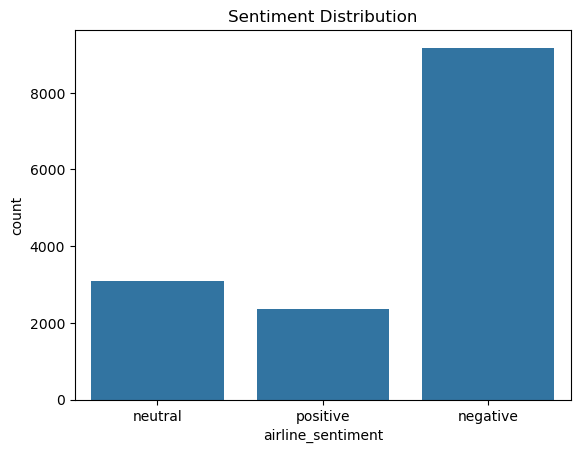

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.countplot(x='airline_sentiment', data=df)
plt.title("Sentiment Distribution")
plt.show()

In [6]:
df[['text', 'airline_sentiment']].sample(10)

,text,airline_sentiment
902,@united landed in Boston at 9 last night. The...,negative
12744,@AmericanAir He thanks you. Anything you can d...,positive
11115,@USAirways @AmericanAir when is US Air switchi...,neutral
2262,@united your costumer service today in the Pr...,negative
8294,"@JetBlue okie doke! Knowing you, you will fix ...",positive
5660,"@SouthwestAir so, when your plane doesn't work...",negative
7437,@JetBlue exactly why is my flight delayed? 599...,negative
10155,@USAirways your customer service is a joke. Fi...,negative
8889,"@JetBlue i'm getting info from the website, bu...",neutral
13236,@AmericanAir wish you had a better mobile app....,negative


In [ ]:
import pymc as pm
import numpy as np
import arviz as az

obs_counts = df['airline_sentiment'].value_counts().sort_index().values
print(obs_counts)

# Set a prior: symmetric Dirichlet prior
alpha_prior = np.array([1, 1, 1])  # Weak prior

with pm.Model() as model:
    # Dirichlet prior
    theta = pm.Dirichlet("theta", a=alpha_prior)
    
    # Observed categorical data
    observed = pm.Categorical("observed", p=theta, observed=np.repeat([0, 1, 2], obs_counts))
    
    # Inference
    trace = pm.sample(2000, return_inferencedata=True)

# Summary of posterior
az.summary(trace, var_names=["theta"])

# Plot posterior distributions
az.plot_posterior(trace, var_names=["theta"]);


Initializing NUTS using jitter+adapt_diag...


[9178 3099 2363]


Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 11 seconds.


,mean,sd,hdi_3%,hdi_97%,mcse_mean,mcse_sd,ess_bulk,ess_tail,r_hat
theta[0],0.627,0.004,0.619,0.634,0.0,0.0,6985.0,5135.0,1.0
theta[1],0.212,0.003,0.205,0.218,0.0,0.0,7034.0,5277.0,1.0
theta[2],0.161,0.003,0.156,0.167,0.0,0.0,7034.0,6004.0,1.0


Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [alpha_population, concentration, theta]


Output()

Sampling 4 chains for 1_000 tune and 2_000 draw iterations (4_000 + 8_000 draws total) took 30 seconds.


Text(0.5, 1.0, 'Posterior Distributions of Sentiment Probabilities by Airline')

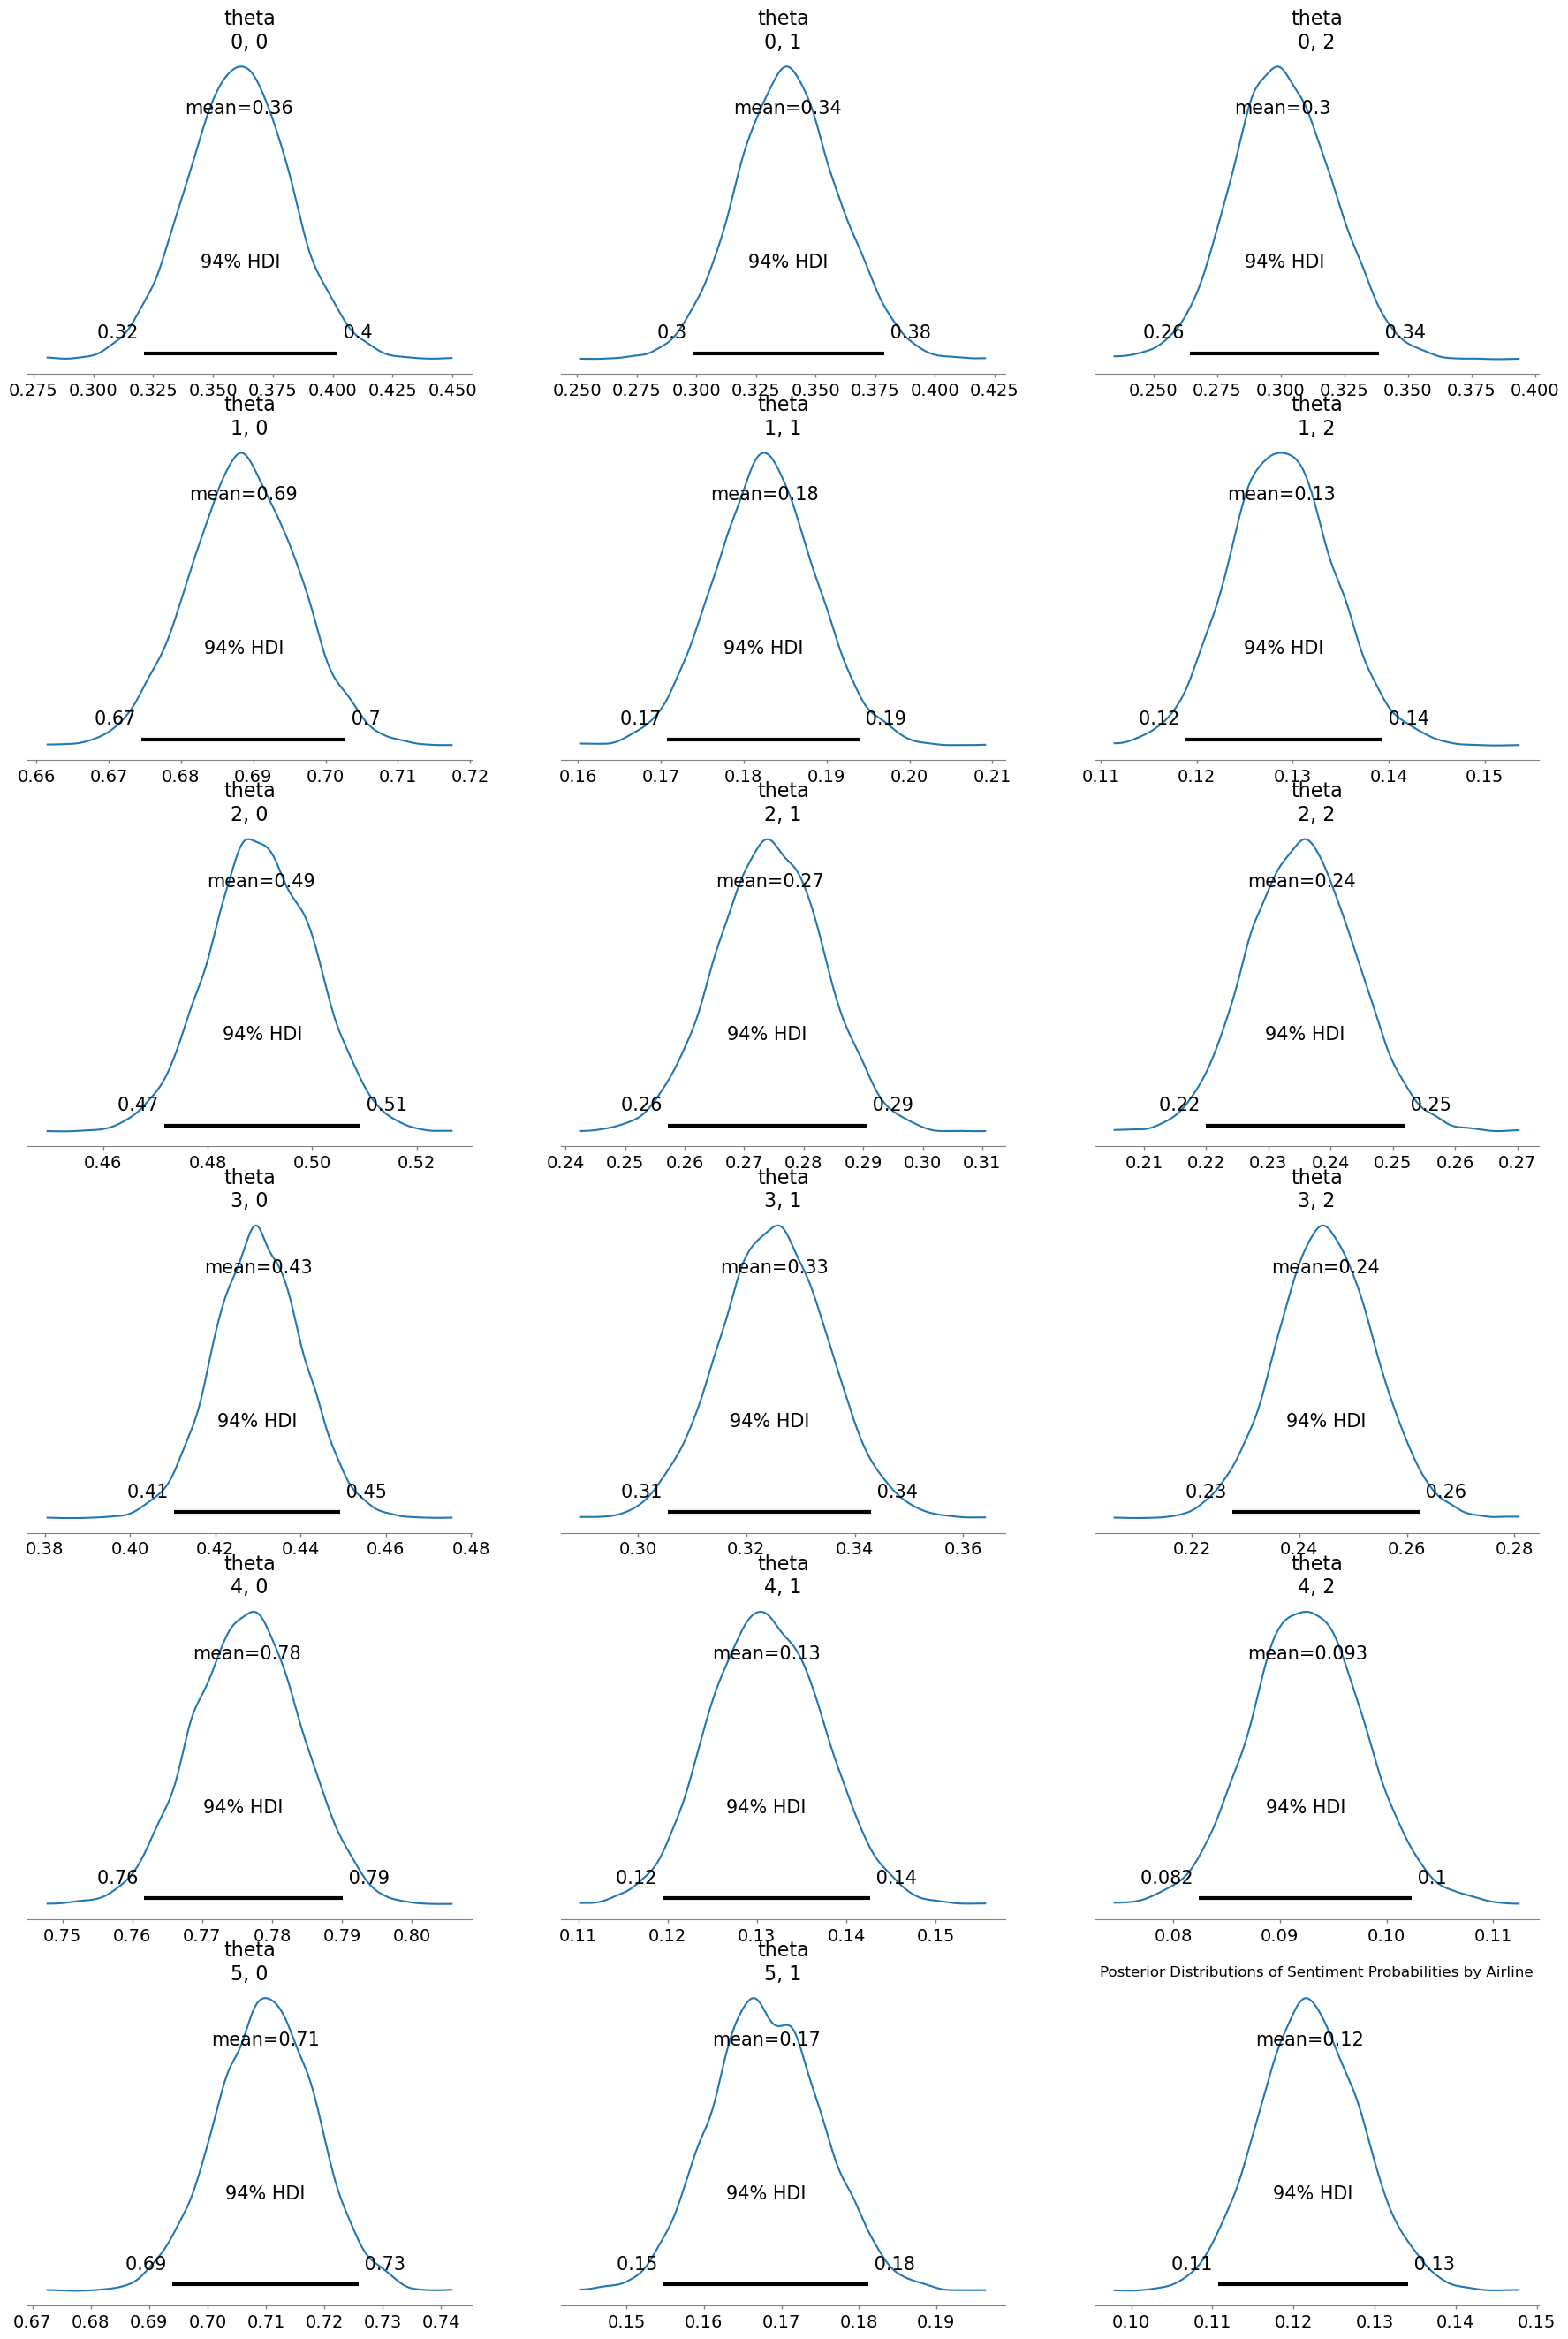

In [18]:
import pymc as pm
import numpy as np
import arviz as az
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# First, let's encode sentiments numerically
sentiment_map = {'negative': 0, 'neutral': 1, 'positive': 2}
df['sentiment_numeric'] = df['airline_sentiment'].map(sentiment_map)

# Create airline-specific data
airlines = df['airline'].unique()
airline_data = {
    airline: {
        'counts': df[df['airline'] == airline]['sentiment_numeric'].value_counts().reindex([0,1,2], fill_value=0).values,
        'total': len(df[df['airline'] == airline])
    }
    for airline in airlines
}

# Enhanced hierarchical model
with pm.Model() as hierarchical_model:
    # Hyperpriors for the population-level sentiment distribution
    alpha_population = pm.Dirichlet('alpha_population', a=np.ones(3))
    
    # Concentration parameter for airline-specific distributions
    concentration = pm.Gamma('concentration', alpha=2, beta=1)
    
    # Airline-specific sentiment distributions
    theta = pm.Dirichlet('theta',
                        a=(alpha_population * concentration)[None, :],
                        shape=(len(airlines), 3))
    
    # Observations for each airline
    for i, airline in enumerate(airlines):
        pm.Categorical(f'obs_{airline}',
                      p=theta[i],
                      observed=np.repeat([0, 1, 2], 
                                       airline_data[airline]['counts']))

    # Sample from posterior
    trace = pm.sample(2000, tune=1000, return_inferencedata=True)

# Plot results
az.plot_posterior(trace, var_names=['theta'])
plt.title('Posterior Distributions of Sentiment Probabilities by Airline')

Available parameters in trace:
['theta[0, 0]', 'theta[0, 1]', 'theta[0, 2]', 'theta[1, 0]', 'theta[1, 1]']


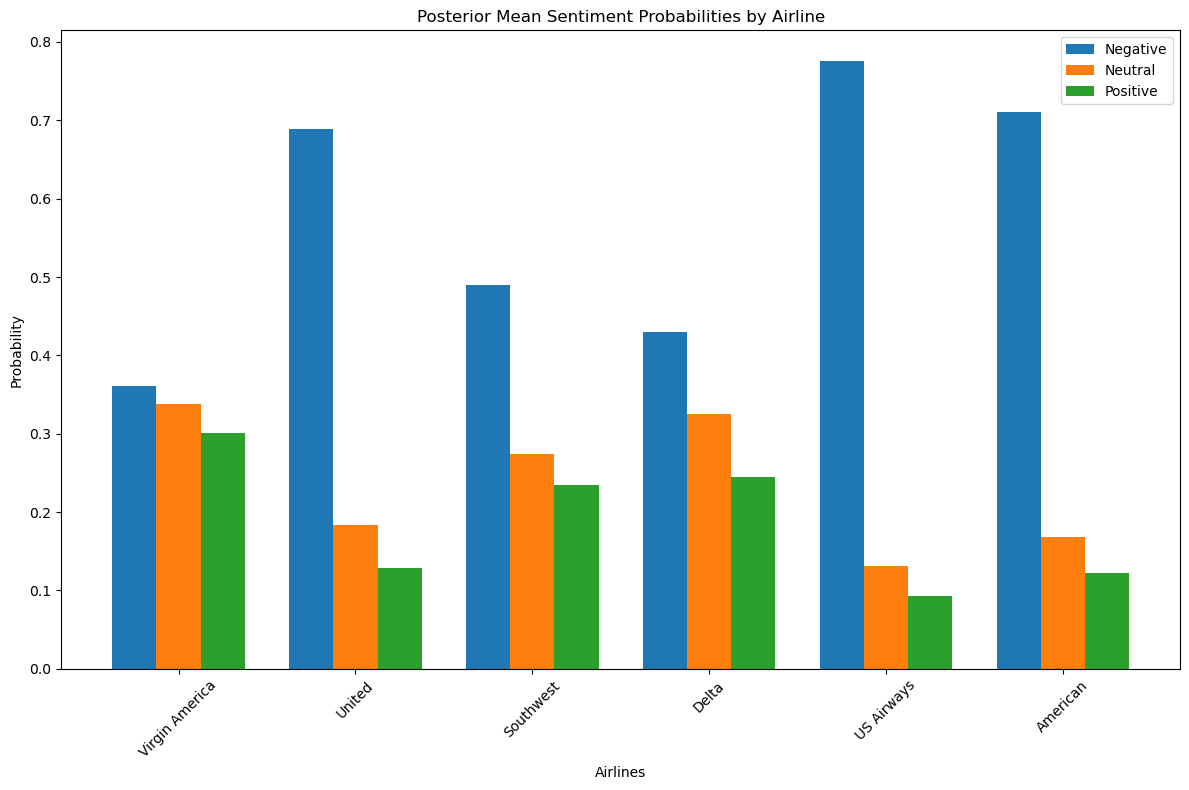

In [ ]:
# Add visualization of differences between airlines
def plot_sentiment_comparisons(trace, airlines):
    plt.figure(figsize=(12, 8))
    
    # Extract posterior means for each airline
    posterior_means = az.summary(trace, var_names=['theta'])
    
    # Create sentiment comparison plot
    sentiment_labels = ['Negative', 'Neutral', 'Positive']
    x = np.arange(len(airlines))
    width = 0.25

    for i, sentiment in enumerate(sentiment_labels):
        values = []
        for j in range(len(airlines)):
            # Correct index format for accessing posterior means
            key = f'theta[{j}, {i}]'
            values.append(posterior_means.loc[key, 'mean'])

        plt.bar(x + i*width, values, width, label=sentiment)

    plt.xlabel('Airlines')
    plt.ylabel('Probability')
    plt.ylim(0, 1)
    plt.title('Posterior Mean Sentiment Probabilities by Airline')
    plt.xticks(x + width, airlines, rotation=45)
    plt.legend()
    plt.tight_layout()
    plt.show()
    
# Let's verify the structure of the posterior summary first
print("Available parameters in trace:")
print(az.summary(trace, var_names=['theta']).index.tolist()[:5])  # Show first 5 indices

# Now plot
plot_sentiment_comparisons(trace, airlines)
